# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [6]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
max_count = 100
for count in xrange(max_count):
    lr = 10**np.random.uniform(-5.5,-7)
    rg = 10**np.random.uniform(2,6)
    svm = LinearSVM()
    loss_hist = svm.train(X_train_feats, y_train, learning_rate=lr, reg=rg,
                      num_iters=1500, verbose=True)
    y_train_pred = svm.predict(X_train_feats)
    accu_train = np.mean(y_train == y_train_pred)
    y_val_pred = svm.predict(X_val_feats)
    accu_val = np.mean(y_val == y_val_pred)
    if accu_val>best_val :
        best_val = accu_val
        best_svm = svm
    results[(lr,rg)]= (accu_train,accu_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

iteration 0 / 1500: loss 124.377567
iteration 100 / 1500: loss 13.057370
iteration 200 / 1500: loss 9.142223
iteration 300 / 1500: loss 9.004796
iteration 400 / 1500: loss 8.999911
iteration 500 / 1500: loss 8.999706
iteration 600 / 1500: loss 8.999790
iteration 700 / 1500: loss 8.999745
iteration 800 / 1500: loss 8.999799
iteration 900 / 1500: loss 8.999741
iteration 1000 / 1500: loss 8.999774
iteration 1100 / 1500: loss 8.999771
iteration 1200 / 1500: loss 8.999749
iteration 1300 / 1500: loss 8.999819
iteration 1400 / 1500: loss 8.999759
iteration 0 / 1500: loss 303.886551
iteration 100 / 1500: loss 8.999928
iteration 200 / 1500: loss 8.999924
iteration 300 / 1500: loss 8.999942
iteration 400 / 1500: loss 8.999938
iteration 500 / 1500: loss 8.999956
iteration 600 / 1500: loss 8.999928
iteration 700 / 1500: loss 8.999926
iteration 800 / 1500: loss 8.999937
iteration 900 / 1500: loss 8.999933
iteration 1000 / 1500: loss 8.999935
iteration 1100 / 1500: loss 8.999939
iteration 1200 / 150

cs231n/classifiers/linear_svm.py:80: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
cs231n/classifiers/linear_svm.py:80: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)
cs231n/classifiers/linear_svm.py:96: RuntimeWarning: overflow encountered in multiply
  dW = 2*reg*W



iteration 1400 / 1500: loss nan
iteration 0 / 1500: loss 38.564160
iteration 100 / 1500: loss 9.503552
iteration 200 / 1500: loss 9.007620
iteration 300 / 1500: loss 8.999323
iteration 400 / 1500: loss 8.999053
iteration 500 / 1500: loss 8.999053
iteration 600 / 1500: loss 8.999173
iteration 700 / 1500: loss 8.999177
iteration 800 / 1500: loss 8.999017
iteration 900 / 1500: loss 8.999014
iteration 1000 / 1500: loss 8.998998
iteration 1100 / 1500: loss 8.999110
iteration 1200 / 1500: loss 8.999172
iteration 1300 / 1500: loss 8.998943
iteration 1400 / 1500: loss 8.999108
iteration 0 / 1500: loss 975.654871
iteration 100 / 1500: loss 9.000046
iteration 200 / 1500: loss 9.000052
iteration 300 / 1500: loss 9.000061
iteration 400 / 1500: loss 9.000060
iteration 500 / 1500: loss 9.000089
iteration 600 / 1500: loss 9.000080
iteration 700 / 1500: loss 9.000037
iteration 800 / 1500: loss 9.000062
iteration 900 / 1500: loss 9.000070
iteration 1000 / 1500: loss 9.000061
iteration 1100 / 1500: los

cs231n/classifiers/linear_svm.py:77: RuntimeWarning: invalid value encountered in subtract
  margins = np.maximum(0, scores - scores[np.arange(num_train),y].reshape(num_train,1) + 1) # delta 1
cs231n/classifiers/linear_classifier.py:72: RuntimeWarning: invalid value encountered in add
  self.W += -learning_rate*grad
cs231n/classifiers/linear_svm.py:98: RuntimeWarning: invalid value encountered in greater
  mask[margins > 0] = 1


In [7]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.423


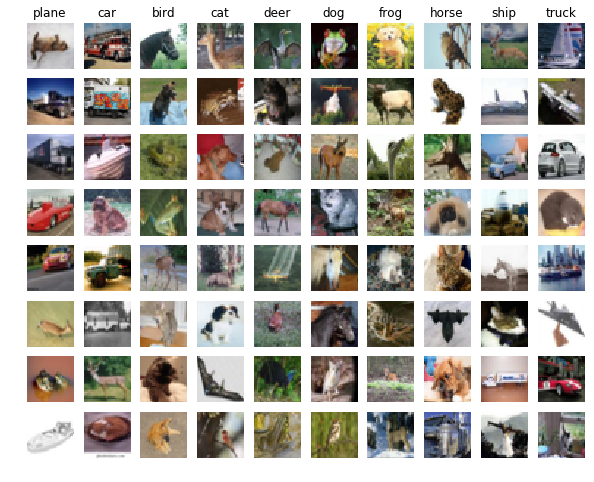

In [8]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [9]:
print(X_train_feats.shape)

(49000, 155)


In [50]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_size = X_train_feats.shape[1]
hidden_size = 50
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
results = {}
best_val = -1

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
max_count = 30
for count in xrange(max_count):
    print('iteration globale ', count)
    lr = 10**np.random.uniform(0.5,-0.5)
    #hidden_size = np.random.randint(400,600)
    lrd = 1
    rg = 10**np.random.uniform(-3,-6)
    net = TwoLayerNet(input_size, hidden_size, num_classes)
    stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=1000, batch_size=500,
            learning_rate=lr, learning_rate_decay=lrd,
            reg=rg, verbose=True)

    # Predict on the validation set
    #val_acc = (net.predict(X_val) == y_val).mean()
    #print('Validation accuracy: ', val_acc)

    loss_hist = stats['loss_history']
    accu_train = stats['train_acc_history'][len(stats['train_acc_history']) - 1]
    accu_val = stats['val_acc_history'][len(stats['val_acc_history']) -1]
    if accu_val>best_val :
        best_val = accu_val
        best_net = net
    results[(lr,rg)]= (accu_train,accu_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration globale  0
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 1.894410
iteration 200 / 1000: loss 1.459457
iteration 300 / 1000: loss 1.374753
iteration 400 / 1000: loss 1.303490
iteration 500 / 1000: loss 1.239185
iteration 600 / 1000: loss 1.166368
iteration 700 / 1000: loss 1.261560
iteration 800 / 1000: loss 1.229138
iteration 900 / 1000: loss 1.153708
iteration globale  1
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 1.494076
iteration 200 / 1000: loss 1.332917
iteration 300 / 1000: loss 1.214616
iteration 400 / 1000: loss 1.286263
iteration 500 / 1000: loss 1.172030
iteration 600 / 1000: loss 1.209116
iteration 700 / 1000: loss 1.131476
iteration 800 / 1000: loss 1.103618
iteration 900 / 1000: loss 1.150591
iteration globale  2
iteration 0 / 1000: loss 2.302585
iteration 100 / 1000: loss 1.467000
iteration 200 / 1000: loss 1.264414
iteration 300 / 1000: loss 1.136982
iteration 400 / 1000: loss 1.381645
iteration 500 / 1000: loss 1.313737
iterati

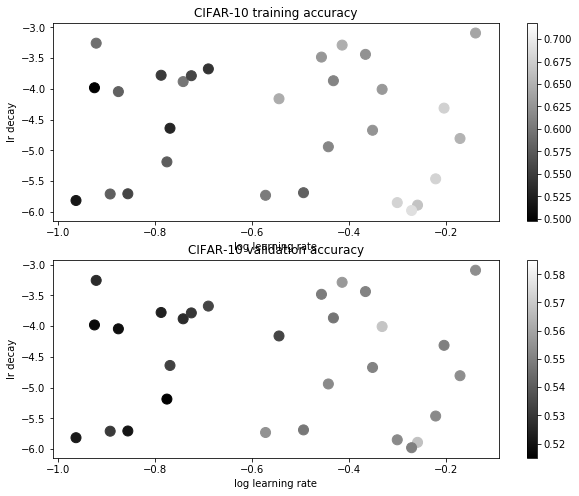

In [49]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]
#y_scatter = [x[1] for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('lr decay')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('lr decay')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [51]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (best_net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.559


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!